### Problem 1
Load Breast Cancer dataset (`sklearn.datasets.load_breast_cancer`), implement PCA from scratch on it and plot the corresponding projection color-coded. Do the same with three arbitrary digits subset from *digits* dataset.

Try projecting *digits* dataset with t-SNE (`sklearn.manifold.TSNE`), compare the results.

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
import scipy.linalg as la
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
#matplotlib inline

In [2]:
#  загружаем данные из датасета
D = load_breast_cancer()
X = D['data']
y = D['target']

In [3]:
# пошагово выполняем алгоритм РСА
mean = X.mean(axis=0)
A = X - mean
A = A.T@A
vals, vects = la.eig(A)

In [4]:
# распечатываем нормализованные (чтобы сумма была равна 1) значения собственных чисел,
# чтобы посмотреть какую долю дисперсии объясняют пераые два собственных значения
vals = np.abs(vals)
print(vals/vals.sum())

[9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07 6.99473205e-08 1.65908880e-08
 6.99641650e-09 4.78318306e-09 2.93549214e-09 1.41684927e-09
 8.29577731e-10 5.20405883e-10 4.08463983e-10 3.63313378e-10
 1.72849737e-10 1.27487508e-10 7.72682973e-11 6.28357718e-11
 3.57302295e-11 2.76396041e-11 1.55344680e-12 8.14452259e-12
 6.30211541e-12 4.43666945e-12]


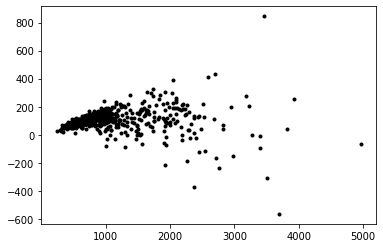

In [5]:
# находим проекцию исходных данных на два собственных вектора, чтобы получить разложение РСА и отображаем черным цветом
Z = X @ vects[:,:2]
plt.plot(Z[:,0], Z[:,1], 'k.')

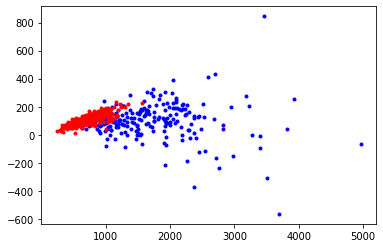

In [6]:
# отображаем разнми цветами два класса
plt.plot(Z[y==0,0], Z[y==0,1], 'b.', Z[y==1,0], Z[y==1,1], 'r.')
plt.show()

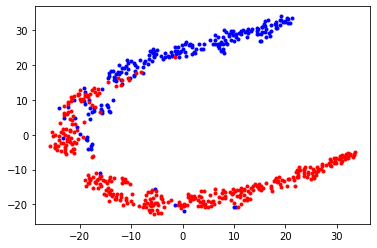

In [7]:
# находим преобразование t-SNE
tsne = TSNE(n_components=2)
Z = tsne.fit_transform(X)
plt.plot(Z[y==0,0], Z[y==0,1], 'b.', Z[y==1,0], Z[y==1,1], 'r.')
plt.show()

In [8]:
# для удобства, создаем функцию, которая находит проекцию РСА
def get_PCA_2D(X):
    mean = X.mean(axis=0)
    A = X - mean
    A = A.T@A
    vals, vects = la.eig(A)
    return X@vects[:,:2]

In [9]:
# загружаем датасет с цифрами и выбираем цифра 7,8,9
D = load_digits()
X = D['data']
y = D['target']

X = X[y>=7,:]
y = y[y>=7]

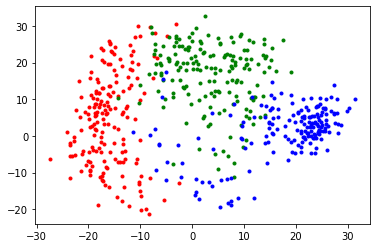

In [10]:
# назходим РСА для цифр и отображаем
Z = get_PCA_2D(X)
plt.plot(Z[y==7,0], Z[y==7,1], 'r.', Z[y==8,0], Z[y==8,1], 'g.', Z[y==9,0], Z[y==9,1], 'b.')
plt.show()

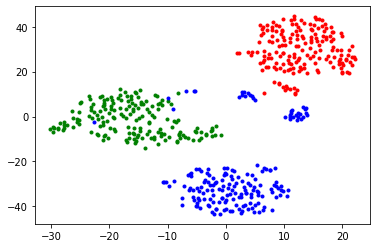

In [11]:
# находим t-SNE для цифра и отображаем
tsne = TSNE(n_components=2)
Z = tsne.fit_transform(X)
plt.plot(Z[y==7,0], Z[y==7,1], 'r.', Z[y==8,0], Z[y==8,1], 'g.', Z[y==9,0], Z[y==9,1], 'b.')
plt.show()

### Problem 2
Load Breast Cancer dataset (sklearn.datasets.load_breast_cancer), use implemented PCA (or sklearn PCA `sklearn.decomposition.PCA`) to project the data onto 1D space using some training subset. Build ROC curve, pick appropriate threshold. Calculate classification metrics on test subset.

In [12]:
import numpy as np
from sklearn.datasets import load_breast_cancer
import scipy.linalg as la
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#matplotlib inline

In [13]:
# загружаем датасет с раковыми пациентами
D = load_breast_cancer()
X = D['data']
y = D['target']

In [14]:
# случайнм образом выбираем тестовые данные, остальные будут обучающей выборкой
test_ids = np.random.randint(0,X.shape[0], size=70)
train_ids = np.setdiff1d(np.arange(0,X.shape[0]), test_ids)

X_train, X_test = X[train_ids,:], X[test_ids,:]
y_train, y_test = y[train_ids], y[test_ids]

In [15]:
# находим РСА на одномерное пространство с помощью библиотечной функции, преобразовываем обучающую выборку
pca = PCA(n_components=1)
pca.fit(X_train)
Z = pca.transform(X_train)

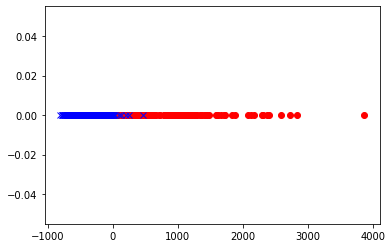

In [16]:
# отображаем полученную проекцию
plt.plot(Z[y_train==0], np.zeros(Z[y_train==0].shape), 'ro', Z[y_train==1], np.zeros(Z[y_train==1].shape), 'bx')

In [17]:
# для того, чтобы найти кривую ROC нужно пройтись по всем возможным значениям порога, выбираем начало, конец и шаг
z_min = int(np.floor(Z.min()))
z_max = int(np.ceil(Z.max()))
dz = 1

In [18]:
# находим значения для кривой ROC в соответствии с алгоритмом из лекции
thresholds = []
tprs = []
fprs = []
for th in range(z_min-1, z_max+1, dz):
    thresholds.append(th)
    tp = np.sum(Z[y_train==1]<th)
    tn = np.sum(Z[y_train==0]>=th)
    fp = np.sum(Z[y_train==0]<th)
    fn = np.sum(Z[y_train==1]>=th)
    tprs.append(tp/(tp+fn))
    fprs.append(fp/(fp+tn))

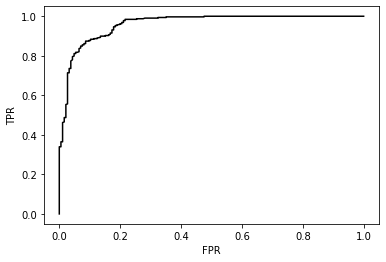

In [19]:
# отображаем кривую
plt.plot(np.array(fprs), np.array(tprs), 'k-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [20]:
# распечатываем значения, чтобы найти подходяший порог
for i in range(len(thresholds)):
    print(thresholds[i], fprs[i], tprs[i])

-815 0.0 0.0
-814 0.0 0.0
-813 0.0 0.0031446540880503146
-812 0.0 0.0031446540880503146
-811 0.0 0.0031446540880503146
-810 0.0 0.0031446540880503146
-809 0.0 0.0031446540880503146
-808 0.0 0.0031446540880503146
-807 0.0 0.0031446540880503146
-806 0.0 0.0031446540880503146
-805 0.0 0.0031446540880503146
-804 0.0 0.0031446540880503146
-803 0.0 0.0031446540880503146
-802 0.0 0.0031446540880503146
-801 0.0 0.0031446540880503146
-800 0.0 0.0031446540880503146
-799 0.0 0.0031446540880503146
-798 0.0 0.0031446540880503146
-797 0.0 0.0031446540880503146
-796 0.0 0.0031446540880503146
-795 0.0 0.0031446540880503146
-794 0.0 0.0031446540880503146
-793 0.0 0.0031446540880503146
-792 0.0 0.0031446540880503146
-791 0.0 0.0031446540880503146
-790 0.0 0.0031446540880503146
-789 0.0 0.0031446540880503146
-788 0.0 0.0031446540880503146
-787 0.0 0.006289308176100629
-786 0.0 0.006289308176100629
-785 0.0 0.006289308176100629
-784 0.0 0.006289308176100629
-783 0.0 0.006289308176100629
-782 0.0 0.0062893

-195 0.043243243243243246 0.7955974842767296
-194 0.04864864864864865 0.7987421383647799
-193 0.04864864864864865 0.7987421383647799
-192 0.04864864864864865 0.8018867924528302
-191 0.04864864864864865 0.8018867924528302
-190 0.04864864864864865 0.8050314465408805
-189 0.04864864864864865 0.8113207547169812
-188 0.05405405405405406 0.8113207547169812
-187 0.05405405405405406 0.8144654088050315
-186 0.05405405405405406 0.8176100628930818
-185 0.05945945945945946 0.8176100628930818
-184 0.05945945945945946 0.8176100628930818
-183 0.05945945945945946 0.8176100628930818
-182 0.06486486486486487 0.8207547169811321
-181 0.06486486486486487 0.8238993710691824
-180 0.06486486486486487 0.8270440251572327
-179 0.06486486486486487 0.8270440251572327
-178 0.06486486486486487 0.8301886792452831
-177 0.06486486486486487 0.8301886792452831
-176 0.06486486486486487 0.8301886792452831
-175 0.06486486486486487 0.8301886792452831
-174 0.06486486486486487 0.8333333333333334
-173 0.06486486486486487 0.8333

304 0.372972972972973 0.9968553459119497
305 0.372972972972973 0.9968553459119497
306 0.372972972972973 0.9968553459119497
307 0.372972972972973 0.9968553459119497
308 0.3783783783783784 0.9968553459119497
309 0.3783783783783784 0.9968553459119497
310 0.3783783783783784 0.9968553459119497
311 0.3783783783783784 0.9968553459119497
312 0.3783783783783784 0.9968553459119497
313 0.3783783783783784 0.9968553459119497
314 0.3783783783783784 0.9968553459119497
315 0.3783783783783784 0.9968553459119497
316 0.3783783783783784 0.9968553459119497
317 0.3837837837837838 0.9968553459119497
318 0.3837837837837838 0.9968553459119497
319 0.3837837837837838 0.9968553459119497
320 0.3837837837837838 0.9968553459119497
321 0.3837837837837838 0.9968553459119497
322 0.3837837837837838 0.9968553459119497
323 0.3837837837837838 0.9968553459119497
324 0.3837837837837838 0.9968553459119497
325 0.3837837837837838 0.9968553459119497
326 0.3837837837837838 0.9968553459119497
327 0.3837837837837838 0.9968553459119

930 0.6972972972972973 1.0
931 0.6972972972972973 1.0
932 0.6972972972972973 1.0
933 0.6972972972972973 1.0
934 0.6972972972972973 1.0
935 0.6972972972972973 1.0
936 0.6972972972972973 1.0
937 0.6972972972972973 1.0
938 0.6972972972972973 1.0
939 0.6972972972972973 1.0
940 0.6972972972972973 1.0
941 0.7027027027027027 1.0
942 0.7027027027027027 1.0
943 0.7027027027027027 1.0
944 0.7027027027027027 1.0
945 0.7027027027027027 1.0
946 0.7027027027027027 1.0
947 0.7027027027027027 1.0
948 0.7027027027027027 1.0
949 0.7081081081081081 1.0
950 0.7081081081081081 1.0
951 0.7135135135135136 1.0
952 0.7135135135135136 1.0
953 0.7135135135135136 1.0
954 0.7135135135135136 1.0
955 0.7135135135135136 1.0
956 0.7135135135135136 1.0
957 0.7135135135135136 1.0
958 0.7135135135135136 1.0
959 0.7135135135135136 1.0
960 0.7135135135135136 1.0
961 0.7135135135135136 1.0
962 0.7135135135135136 1.0
963 0.7135135135135136 1.0
964 0.7135135135135136 1.0
965 0.7135135135135136 1.0
966 0.7135135135135136 1.0
9

1471 0.8918918918918919 1.0
1472 0.8918918918918919 1.0
1473 0.8918918918918919 1.0
1474 0.8918918918918919 1.0
1475 0.8918918918918919 1.0
1476 0.8918918918918919 1.0
1477 0.8918918918918919 1.0
1478 0.8918918918918919 1.0
1479 0.8918918918918919 1.0
1480 0.8918918918918919 1.0
1481 0.8918918918918919 1.0
1482 0.8918918918918919 1.0
1483 0.8918918918918919 1.0
1484 0.8972972972972973 1.0
1485 0.8972972972972973 1.0
1486 0.8972972972972973 1.0
1487 0.8972972972972973 1.0
1488 0.8972972972972973 1.0
1489 0.8972972972972973 1.0
1490 0.8972972972972973 1.0
1491 0.8972972972972973 1.0
1492 0.8972972972972973 1.0
1493 0.8972972972972973 1.0
1494 0.8972972972972973 1.0
1495 0.8972972972972973 1.0
1496 0.8972972972972973 1.0
1497 0.8972972972972973 1.0
1498 0.8972972972972973 1.0
1499 0.8972972972972973 1.0
1500 0.8972972972972973 1.0
1501 0.8972972972972973 1.0
1502 0.8972972972972973 1.0
1503 0.8972972972972973 1.0
1504 0.8972972972972973 1.0
1505 0.8972972972972973 1.0
1506 0.8972972972972

2137 0.9513513513513514 1.0
2138 0.9513513513513514 1.0
2139 0.9513513513513514 1.0
2140 0.9513513513513514 1.0
2141 0.9513513513513514 1.0
2142 0.9513513513513514 1.0
2143 0.9513513513513514 1.0
2144 0.9513513513513514 1.0
2145 0.9513513513513514 1.0
2146 0.9513513513513514 1.0
2147 0.9513513513513514 1.0
2148 0.9513513513513514 1.0
2149 0.9513513513513514 1.0
2150 0.9513513513513514 1.0
2151 0.9513513513513514 1.0
2152 0.9513513513513514 1.0
2153 0.9513513513513514 1.0
2154 0.9513513513513514 1.0
2155 0.9513513513513514 1.0
2156 0.9513513513513514 1.0
2157 0.9513513513513514 1.0
2158 0.9513513513513514 1.0
2159 0.9513513513513514 1.0
2160 0.9513513513513514 1.0
2161 0.9513513513513514 1.0
2162 0.9513513513513514 1.0
2163 0.9513513513513514 1.0
2164 0.9513513513513514 1.0
2165 0.9513513513513514 1.0
2166 0.9513513513513514 1.0
2167 0.9513513513513514 1.0
2168 0.9513513513513514 1.0
2169 0.9513513513513514 1.0
2170 0.9567567567567568 1.0
2171 0.9567567567567568 1.0
2172 0.9567567567567

2733 0.9891891891891892 1.0
2734 0.9891891891891892 1.0
2735 0.9891891891891892 1.0
2736 0.9891891891891892 1.0
2737 0.9891891891891892 1.0
2738 0.9891891891891892 1.0
2739 0.9891891891891892 1.0
2740 0.9891891891891892 1.0
2741 0.9891891891891892 1.0
2742 0.9891891891891892 1.0
2743 0.9891891891891892 1.0
2744 0.9891891891891892 1.0
2745 0.9891891891891892 1.0
2746 0.9891891891891892 1.0
2747 0.9891891891891892 1.0
2748 0.9891891891891892 1.0
2749 0.9891891891891892 1.0
2750 0.9891891891891892 1.0
2751 0.9891891891891892 1.0
2752 0.9891891891891892 1.0
2753 0.9891891891891892 1.0
2754 0.9891891891891892 1.0
2755 0.9891891891891892 1.0
2756 0.9891891891891892 1.0
2757 0.9891891891891892 1.0
2758 0.9891891891891892 1.0
2759 0.9891891891891892 1.0
2760 0.9891891891891892 1.0
2761 0.9891891891891892 1.0
2762 0.9891891891891892 1.0
2763 0.9891891891891892 1.0
2764 0.9891891891891892 1.0
2765 0.9891891891891892 1.0
2766 0.9891891891891892 1.0
2767 0.9891891891891892 1.0
2768 0.9891891891891

3304 0.9945945945945946 1.0
3305 0.9945945945945946 1.0
3306 0.9945945945945946 1.0
3307 0.9945945945945946 1.0
3308 0.9945945945945946 1.0
3309 0.9945945945945946 1.0
3310 0.9945945945945946 1.0
3311 0.9945945945945946 1.0
3312 0.9945945945945946 1.0
3313 0.9945945945945946 1.0
3314 0.9945945945945946 1.0
3315 0.9945945945945946 1.0
3316 0.9945945945945946 1.0
3317 0.9945945945945946 1.0
3318 0.9945945945945946 1.0
3319 0.9945945945945946 1.0
3320 0.9945945945945946 1.0
3321 0.9945945945945946 1.0
3322 0.9945945945945946 1.0
3323 0.9945945945945946 1.0
3324 0.9945945945945946 1.0
3325 0.9945945945945946 1.0
3326 0.9945945945945946 1.0
3327 0.9945945945945946 1.0
3328 0.9945945945945946 1.0
3329 0.9945945945945946 1.0
3330 0.9945945945945946 1.0
3331 0.9945945945945946 1.0
3332 0.9945945945945946 1.0
3333 0.9945945945945946 1.0
3334 0.9945945945945946 1.0
3335 0.9945945945945946 1.0
3336 0.9945945945945946 1.0
3337 0.9945945945945946 1.0
3338 0.9945945945945946 1.0
3339 0.9945945945945

In [21]:
# из распечатанных значений нашли порог, нашли преобразование тестовой выборки
threshold = 4
Z_test = pca.transform(X_test)

In [22]:
# находим метрики на тестовой выборке
tp = np.sum(Z_test[y_test==1]<th)
tn = np.sum(Z_test[y_test==0]>=th)
fp = np.sum(Z_test[y_test==0]<th)
fn = np.sum(Z_test[y_test==1]>=th)

recall = tp/(tp+fn)
precision=tp/(tp+fp)

print(f'Accuracy:{(tp+tn)/(tp+tn+fp+fn)}')
print(f'Recall:{recall}')
print(f'Precison:{precision}')
print(f'F1:{2*precision*recall/(precision+recall)}')

Accuracy:0.5714285714285714
Recall:1.0
Precison:0.5714285714285714
F1:0.7272727272727273


### Problem 3
Generate 3 scaled sinusoidal signals of sufficiently large length. Find 5 linear mixtures of these signals using some arbitrary numbers for scale. Perform ICA (sklearn.decomposition.FastICA) on the resulting signal, visually check how close reconstructed components are to the original signals.